In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

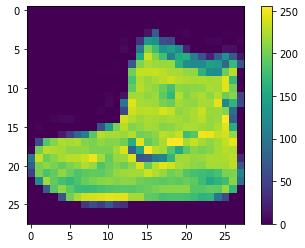

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

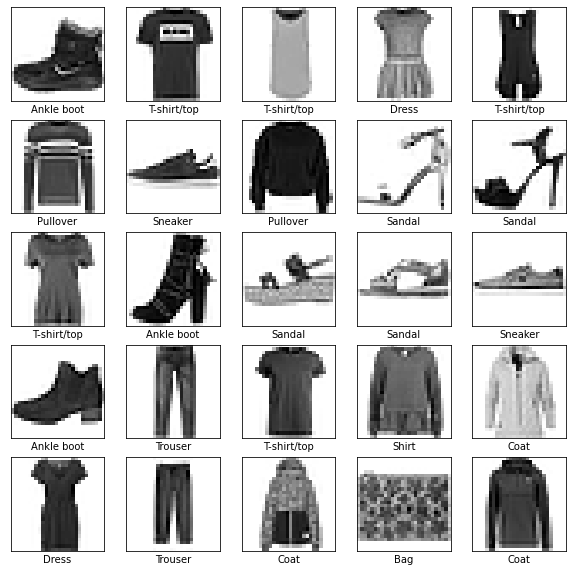

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.4983 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.3728 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 1s 670us/step - loss: 0.3349 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.3117 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 1s 679us/step - loss: 0.2930 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 1s 699us/step - loss: 0.2779 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.2662 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.2559 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.2460 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 1s 635u

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3637 - accuracy: 0.8693



Test accuracy: 0.8693000078201294


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([5.7837735e-09, 8.9297103e-10, 2.7257840e-09, 3.5095950e-13,
       4.0418801e-08, 4.6732623e-04, 4.2524713e-09, 2.2271203e-03,
       9.3369501e-10, 9.9730551e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

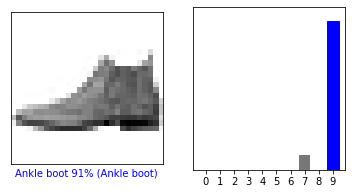

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

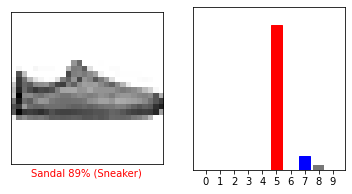

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

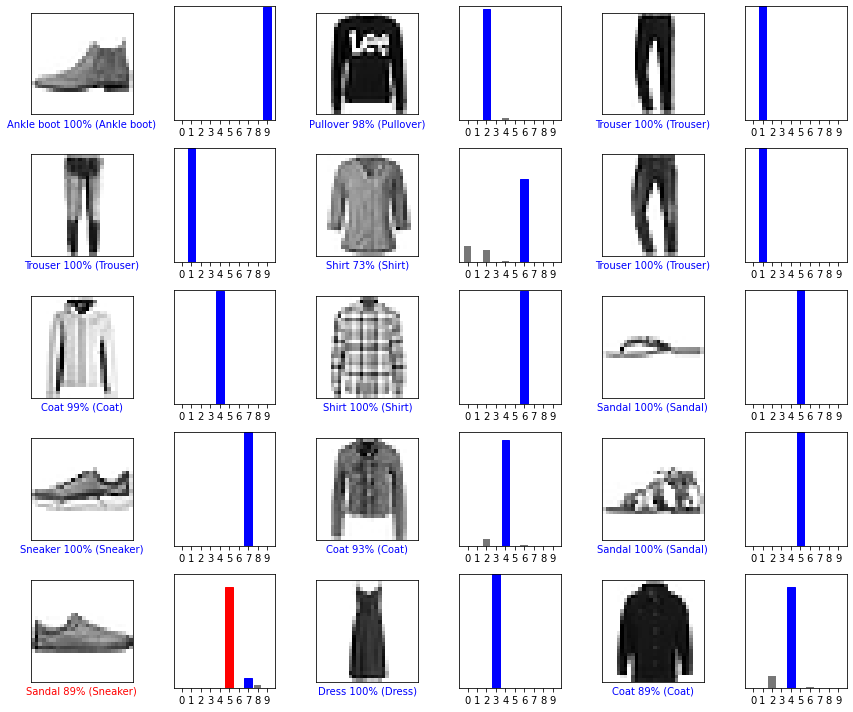

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.9444380e-07 3.0099512e-12 9.7593862e-01 1.2397981e-14 2.3982581e-02
  2.7380212e-12 7.8177378e-05 1.7804736e-14 2.4403625e-11 1.7932600e-15]]


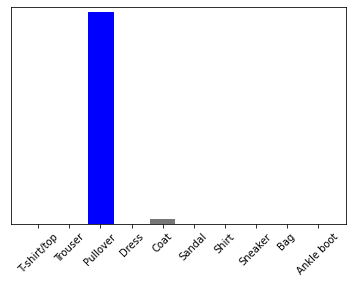

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2